In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import numpy.random as rng
from sklearn import datasets, neighbors
import seaborn as sns
import pandas as pd
np.set_printoptions(precision=3) # limit precision when printing arrays

In [2]:
# Sample Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# To suppress boring warnings...
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [4]:
### This is the code block to load the csv files for training/testing.

datasets  = {}

df = pd.read_csv('./ionosphere_new.csv')
X, y = df.drop('class', axis=1),  df['class']
datasets["ionosphere"] = (X,y)

df = pd.read_csv('./steelplates_new.csv')
X, y = df.drop('Class', axis=1),  df['Class']
datasets["steelplates"] = (X,y)

df = pd.read_csv('./banknotes_new.csv')
X, y = df.drop('Class', axis=1),  df['Class']
datasets["banknotes"] = (X,y)

# TODO: set the number of trials required to evaluate the performance of a classifier.
nTrials = 50

In [5]:
import numpy as np
import random
from sklearn.metrics import accuracy_score

@ignore_warnings(category=ConvergenceWarning)
def test(dataname, classifier, controlName, controlOptions, noXtics=False):
    random.seed(100)  # Python's built-in random module
    np.random.seed(100)
    
    X,y = datasets[dataname]
    X =  StandardScaler().fit_transform(X) #Standardize the value range of each feature in the dataset.
    org_ctl_options = controlOptions
    scores = np.zeros(shape=(nTrials, len(controlOptions)))
    mean_test_error = np.zeros(shape=(len(controlOptions)))
    
    for t in range(nTrials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=t)
        for i,option in enumerate(controlOptions):
            model = classifier(**{controlName: option})
            model.fit(X_train, y_train)
            scores[t,i] += model.score(X_test, y_test)
            mean_test_error[i] += 1 - accuracy_score(y_test, model.predict(X_test)) #calculate the test error
    
    mean_test_error /= nTrials #calculate the mean test error
    print("{0:.3f} was the lowest mean test error of {1} on {2} with {3} = {4}".format(np.min(mean_test_error), type(model).__name__[:12], dataname, controlName, controlOptions[np.argmin(mean_test_error)]))     
    
    # Draw the box plots to visually display the model performance.
    if controlName in ['alpha']: controlOptions = np.log10(controlOptions) # for semilogx
    elif controlName in ['kernel']: controlOptions = [1, 2, 3, 4]
    a = plt.boxplot(scores, positions=controlOptions, showfliers=False)
    if noXtics:
        plt.xticks([])
    else:
        if controlName in ['kernel']:
            plt.xticks(controlOptions, org_ctl_options)
        plt.xlabel(controlName)
    plt.title(dataname + " " + type(model).__name__[:12])
    print("{0:.2f} was the best {1} on {2}".format(np.max(scores.mean(axis=0)),type(model).__name__[:12],dataname))
    
    return(plt)

In [6]:
def testSeveralDatas(classifier, controlName, options):
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    test("banknotes", classifier, controlName, options)
    plt.subplot(132)
    test("steelplates", classifier, controlName, options)
    plt.subplot(133)
    test("ionosphere", classifier, controlName, options)
    plt.savefig(type(classifier()).__name__ + ".png")

0.001 was the lowest mean test error of KNeighborsCl on banknotes with n_neighbors = 2
1.00 was the best KNeighborsCl on banknotes
0.019 was the lowest mean test error of KNeighborsCl on steelplates with n_neighbors = 1
0.98 was the best KNeighborsCl on steelplates
0.146 was the lowest mean test error of KNeighborsCl on ionosphere with n_neighbors = 1
0.85 was the best KNeighborsCl on ionosphere


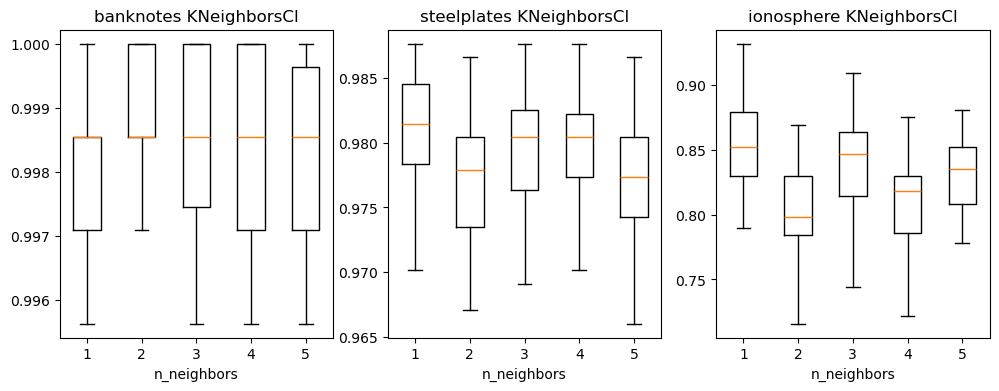

In [16]:
testSeveralDatas(KNeighborsClassifier,"n_neighbors", range(1,6,1))

0.022 was the lowest mean test error of DecisionTree on banknotes with max_depth = 10
0.98 was the best DecisionTree on banknotes
0.000 was the lowest mean test error of DecisionTree on steelplates with max_depth = 6
1.00 was the best DecisionTree on steelplates
0.114 was the lowest mean test error of DecisionTree on ionosphere with max_depth = 2
0.89 was the best DecisionTree on ionosphere


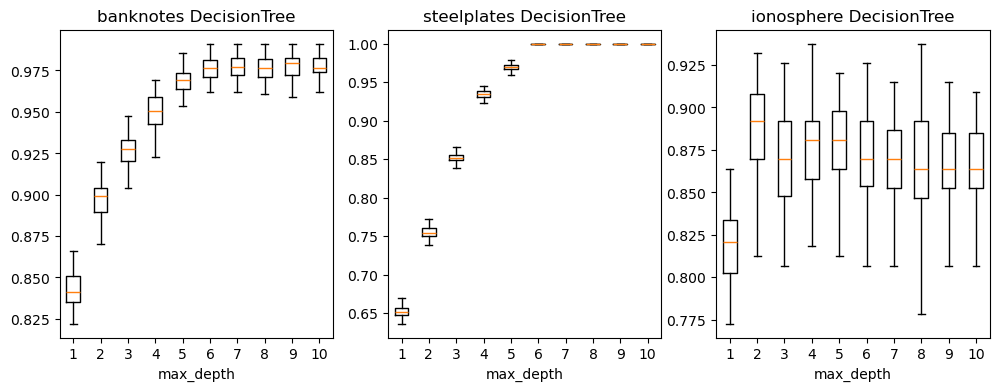

In [21]:
testSeveralDatas(DecisionTreeClassifier,"max_depth", range(1,11,1))

0.016 was the lowest mean test error of LogisticRegr on banknotes with C = 5.0
0.98 was the best LogisticRegr on banknotes
0.000 was the lowest mean test error of LogisticRegr on steelplates with C = 5.0
1.00 was the best LogisticRegr on steelplates
0.124 was the lowest mean test error of LogisticRegr on ionosphere with C = 0.1
0.88 was the best LogisticRegr on ionosphere


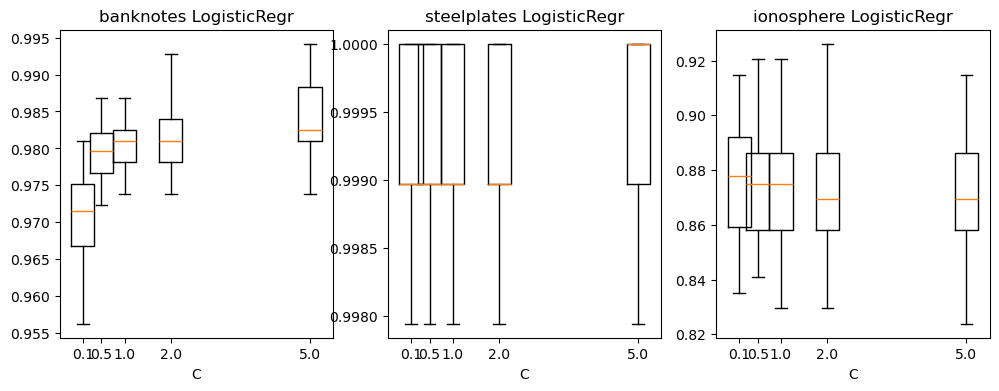

In [17]:
testSeveralDatas(LogisticRegression,"C", [.1,.5,1.0,2.0, 5.0])

0.010 was the lowest mean test error of RandomForest on banknotes with max_depth = 9
0.99 was the best RandomForest on banknotes
0.015 was the lowest mean test error of RandomForest on steelplates with max_depth = 10
0.98 was the best RandomForest on steelplates
0.072 was the lowest mean test error of RandomForest on ionosphere with max_depth = 6
0.93 was the best RandomForest on ionosphere


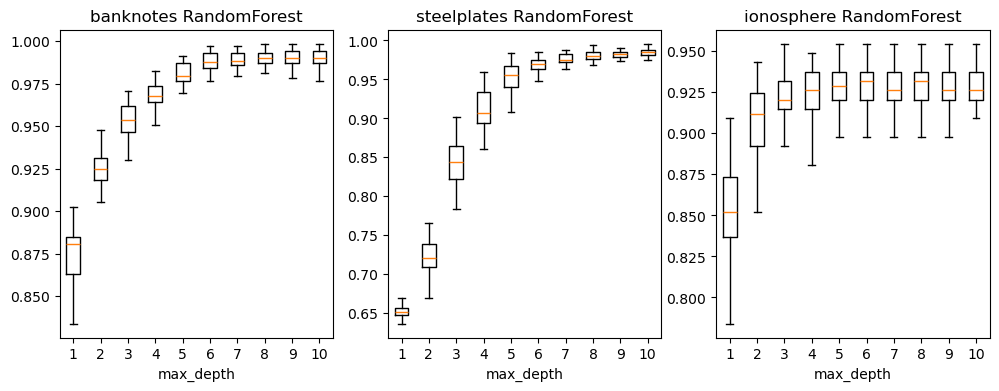

In [18]:
testSeveralDatas(RandomForestClassifier, "max_depth", range(1,11,1))

0.002 was the lowest mean test error of MLPClassifie on banknotes with alpha = 0.001
1.00 was the best MLPClassifie on banknotes
0.001 was the lowest mean test error of MLPClassifie on steelplates with alpha = 10.0
1.00 was the best MLPClassifie on steelplates
0.098 was the lowest mean test error of MLPClassifie on ionosphere with alpha = 0.001
0.90 was the best MLPClassifie on ionosphere


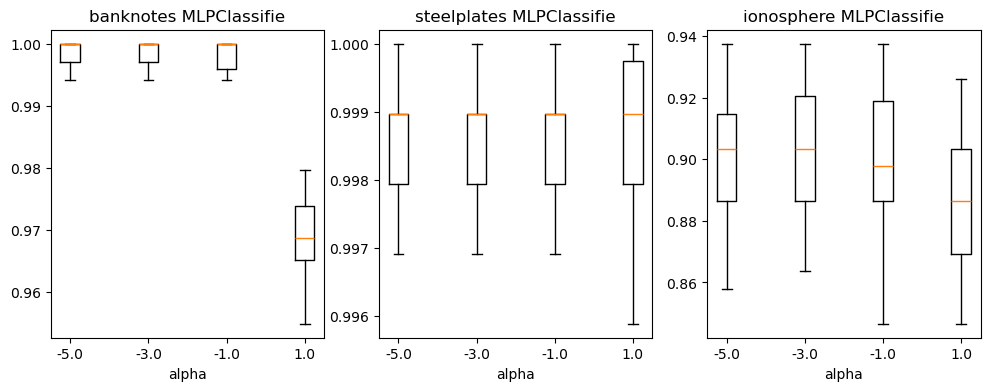

In [19]:
testSeveralDatas(MLPClassifier,"alpha",[1e-5, 1e-3,0.1,10.0]) 

0.001 was the lowest mean test error of SVC on banknotes with kernel = rbf
1.00 was the best SVC on banknotes
0.000 was the lowest mean test error of SVC on steelplates with kernel = linear
1.00 was the best SVC on steelplates
0.060 was the lowest mean test error of SVC on ionosphere with kernel = rbf
0.94 was the best SVC on ionosphere


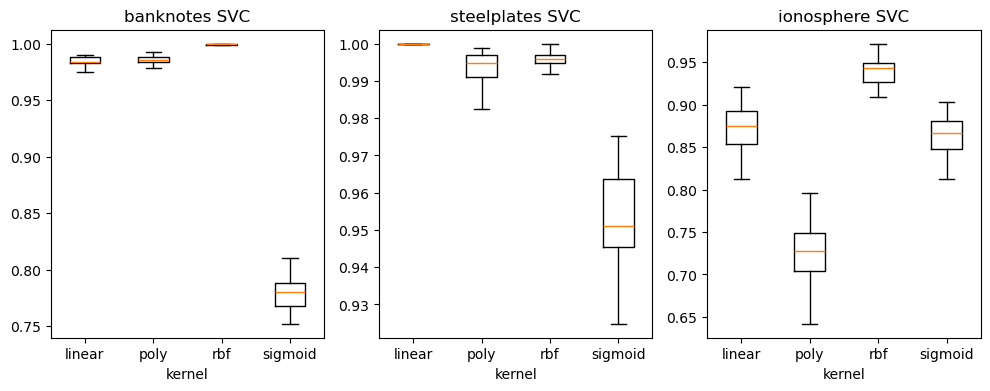

In [20]:
testSeveralDatas(SVC, "kernel" , ['linear','poly', 'rbf', 'sigmoid'])

In [47]:
from sklearn.metrics import RocCurveDisplay
@ignore_warnings(category=ConvergenceWarning)
def test2(classifier, controlName, option):
    random.seed(100)
    np.random.seed(100)
    dataname = ["banknotes","steelplates","ionosphere"]
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for t in range(3):
        X,y = datasets[dataname[t]]
        X =  StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.seed(100))
        clf = classifier(**{controlNameame: option})
        clf.fit(X_train, y_train)
        roc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axes[t])
        axes[t].set_title(dataname[t])
plt.show()

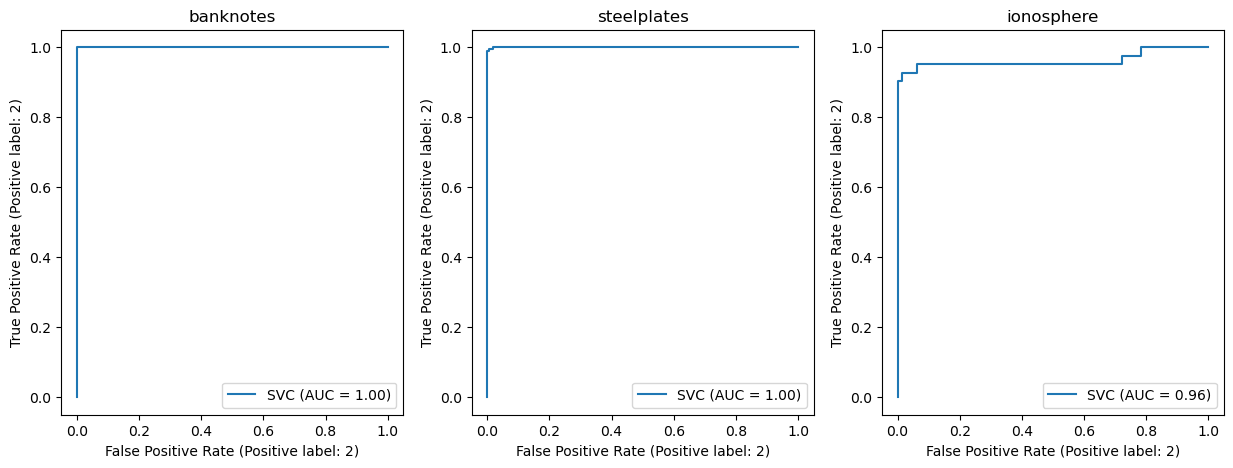

In [48]:
test2(SVC, "kernel" , 'rbf')

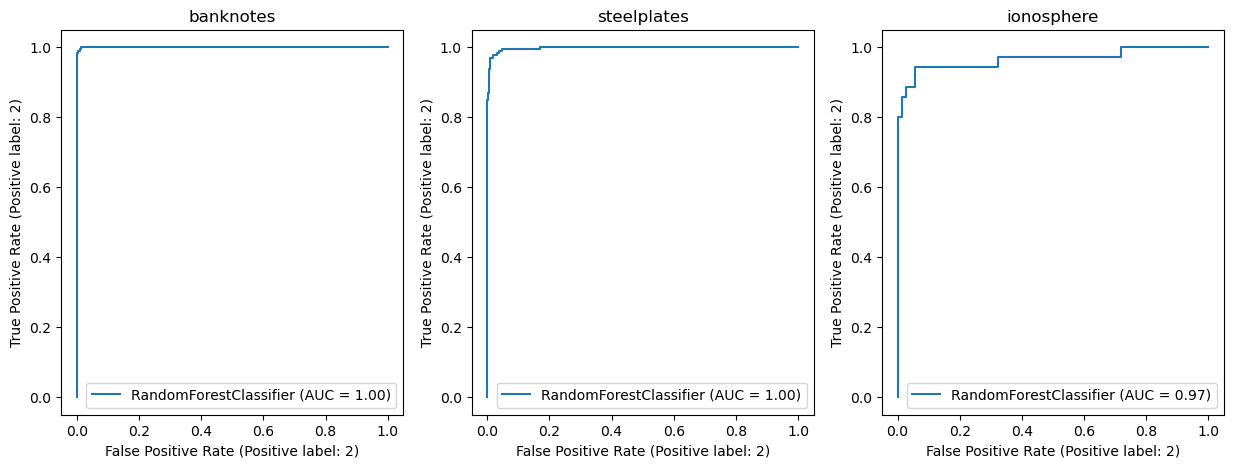

In [49]:
test2(RandomForestClassifier, "max_depth", 5)